# 1. Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Importing dataset

In [3]:
df=pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# 3. Exploratory Data Analysis

## 3.1 Feature exploration

In [4]:
df.shape

(1143, 13)

In [5]:
# checking null values

df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

<AxesSubplot:>

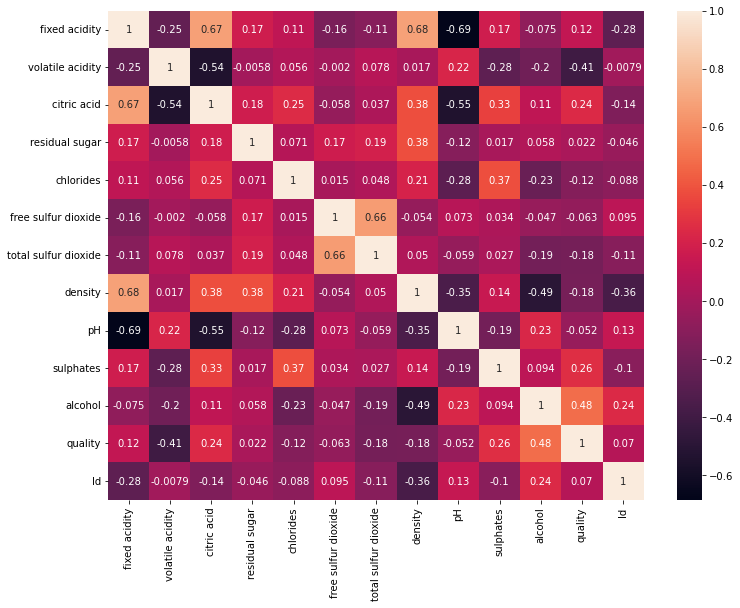

In [6]:
# checking correlation

corr=df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr,annot=True)

In [7]:
# making series of target variable

target=df['quality']
target.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [8]:
# Dropping target and Id columns

df.drop(columns=['quality','Id'],axis=1,inplace=True)

## 3.2 Balancing the dataset

<AxesSubplot:ylabel='quality'>

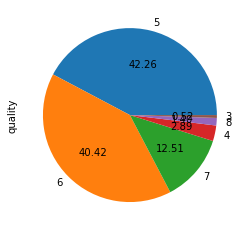

In [15]:
# Checking if data is balanced

target.value_counts().plot.pie(autopct='%.2f')

In [18]:
# since dataset is inbalanced, using over sampling to balance dataset

from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler(sampling_strategy='not majority')
X_ros,y_ros=ros.fit_resample(df,target)

(2898,)


<AxesSubplot:ylabel='quality'>

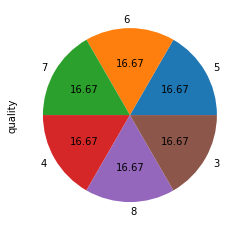

In [19]:
print(y_ros.shape)
y_ros.value_counts().plot.pie(autopct='%.2f')

In [20]:
X_ros.shape

(2898, 11)

## 3.3 Plotting features

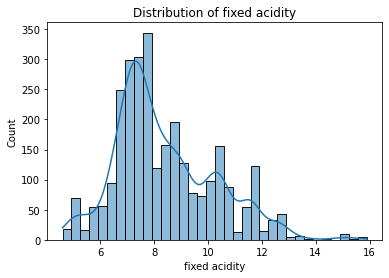

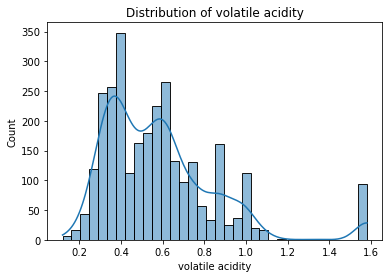

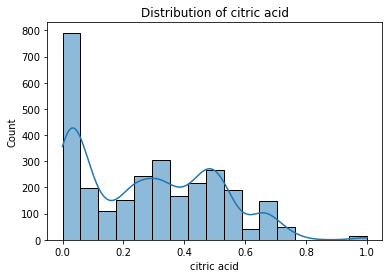

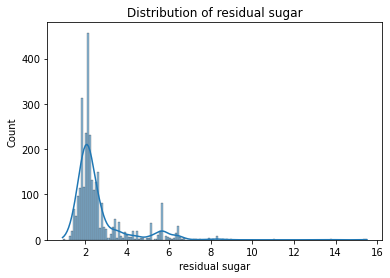

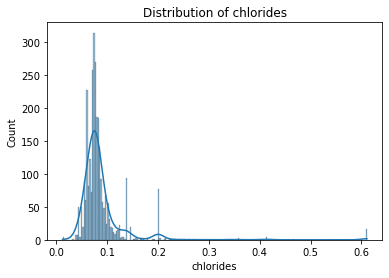

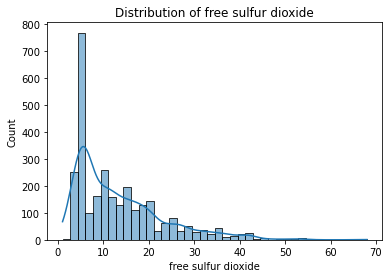

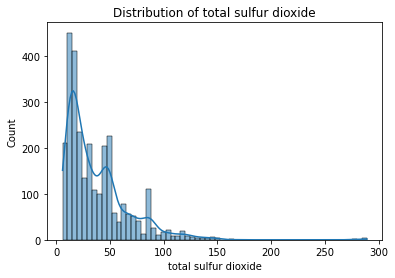

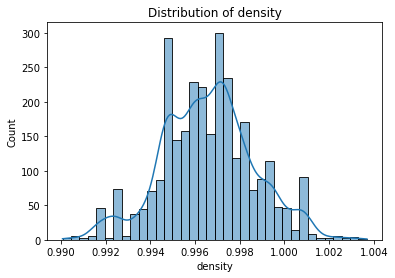

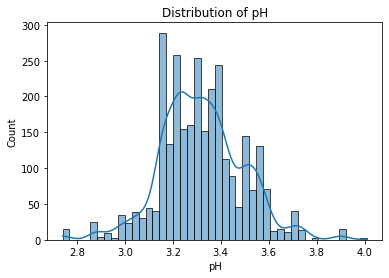

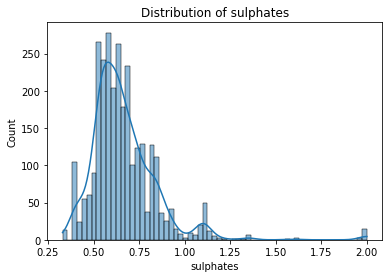

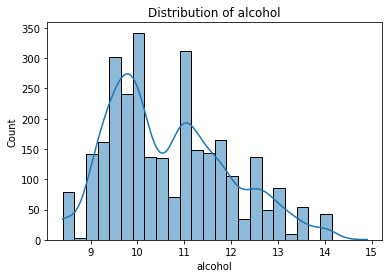

In [21]:
# plotting features 

for col in X_ros.columns:
    sns.histplot(X_ros[col],kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

# 4. Train-Test split and feature scaling

In [22]:
# splitting dataset into train and test

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_ros,y_ros,random_state=0,test_size=.2)

In [23]:
# feature scaling

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit_transform(X_train,y_train)
scaler.transform(X_test)

array([[-2.05250299, -0.24396553, -0.58061821, ...,  3.37935869,
        -0.56018991,  1.92748656],
       [-0.03410052, -1.04196857,  0.95835005, ..., -0.30076769,
        -0.14016073,  1.13740454],
       [-0.90692321,  0.31826388, -0.94272838, ...,  0.16654995,
        -0.66519721, -0.44275951],
       ...,
       [-0.41596045,  3.60095817, -1.25957479, ...,  1.04277052,
        -1.40024828,  0.18930611],
       [ 0.83872217, -0.86060424,  0.59623987, ..., -0.65125591,
        -0.8752118 , -0.91680873],
       [-1.23423172, -0.09887407, -1.25957479, ...,  1.56850286,
        -0.66519721,  0.66335532]])

# 5. Model building and model validation

In [24]:
# using random forest to build model

from sklearn.ensemble import RandomForestClassifier

rfc_model=RandomForestClassifier(n_estimators=200,random_state=0)
rfc_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [25]:
# validation of test data using random forest model

from sklearn.metrics import accuracy_score,f1_score

rfc_pred=rfc_model.predict(X_test)
print(f'Accuracy score is {accuracy_score(rfc_pred,y_test)}')

rfc_f1score=f1_score(rfc_pred,y_test,average='weighted')
print(f'F1 Score: {rfc_f1score}')

Accuracy score is 0.8827586206896552
F1 Score: 0.8865409061353446


In [27]:
# using xgboost for model building 

from xgboost import XGBClassifier

xgb_model=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
xgb_model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:08:05] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [28]:
# validation of test data using xgboost

xgb_pred=xgb_model.predict(X_test)
print(f'Accuracy score is {accuracy_score(xgb_pred,y_test)}')
xgb_f1score=f1_score(xgb_pred,y_test,average='weighted')
print(f'F1 Score: {xgb_f1score}')

Accuracy score is 0.8844827586206897
F1 Score: 0.8885266213397062


<AxesSubplot:title={'center':'Countplot of test quality'}, xlabel='count', ylabel='quality'>

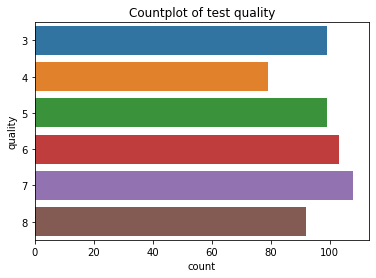

In [31]:
# Plotting test indepedent variable & predicted results

plt.title('Countplot of test quality')
sns.countplot(y=y_test)

<AxesSubplot:title={'center':'Countplot of predicated quality with random forest'}, xlabel='count'>

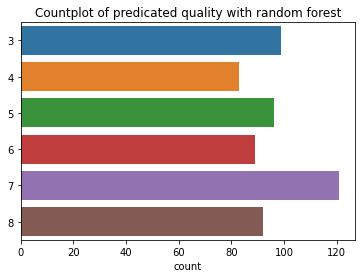

In [32]:
# with random forest 
plt.title('Countplot of predicated quality with random forest')
sns.countplot(y=rfc_pred)

<AxesSubplot:title={'center':'Countplot of predicated quality with xgboost'}, xlabel='count'>

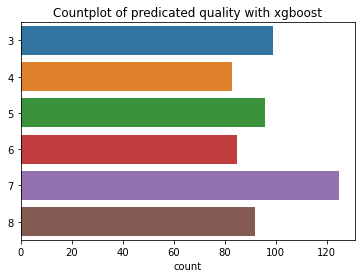

In [33]:
# with xgboost
plt.title('Countplot of predicated quality with xgboost')
sns.countplot(y=xgb_pred)